In [90]:
import pandas as pd
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



In [56]:

# Charger les données
train_full = pd.read_csv("train_full.csv")
test_full  = pd.read_csv("test_full.csv")

print(train_full.shape)
print(test_full.shape)

train_full.head()



(9196, 24)
(2288, 22)


,Id,week,region_code,region_name,TauxGrippe,year,week_num,month,t,pmer,...,TauxGrippe_google,pop_0_19,pop_20_39,pop_40_59,pop_60_74,pop_75_plus,pop_total,requete_grippe,requete_grippe_aviaire_vaccin,requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie
0,5523,201152,42,ALSACE,66,2011,52,12,278.613306,101860.544355,...,66,448112,479905,526481,250849,146978,1852325,2,2,2
1,5524,201152,72,AQUITAINE,24,2011,52,12,282.006707,102447.682927,...,24,732120,765143,896030,516065,344875,3254233,2,2,2
2,5525,201152,83,AUVERGNE,91,2011,52,12,278.906452,102179.798387,...,91,294709,305778,375485,223830,150880,1350682,3,3,2
3,5526,201152,25,BASSE-NORMANDIE,49,2011,52,12,281.327209,101840.124031,...,49,354514,336201,401766,228888,154315,1475684,2,2,2
4,5527,201152,26,BOURGOGNE,33,2011,52,12,278.612857,102035.428571,...,33,372023,369737,450664,269109,181201,1642734,2,2,1


In [ ]:
# enlever la colonne
train_full = train_full.drop(columns=["TauxGrippe_google"])
train_full.columns


Index(['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year',
       'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google',
       'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus',
       'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin',
       'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie'],
      dtype='object')

In [59]:

test_full  = pd.read_csv("test_full.csv")
test_full.head()
test_full.columns

Index(['Id', 'week', 'region_code', 'region_name', 'year', 'week_num', 'month',
       't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39',
       'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe',
       'requete_grippe_aviaire_vaccin',
       'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie'],
      dtype='object')

Train: (9196, 23), Test: (2288, 23), Combined: (11484, 23)
Nombre de features: 42
TauxGrippe_google dans features ? False

Train: (8030, 42), Validation: (1144, 42)

=== ENTRAÎNEMENT XGBOOST ===
[0]	validation_0-rmse:160.08009
[50]	validation_0-rmse:73.16810
[100]	validation_0-rmse:73.06703
[150]	validation_0-rmse:73.66035
[200]	validation_0-rmse:75.03195
[250]	validation_0-rmse:75.52367
[300]	validation_0-rmse:76.84490
[350]	validation_0-rmse:77.35360
[400]	validation_0-rmse:77.95986
[450]	validation_0-rmse:78.90499
[500]	validation_0-rmse:79.16792
[550]	validation_0-rmse:80.13624
[599]	validation_0-rmse:81.04604

=== ÉVALUATION ===
RMSE sur validation: 81.05
MAE sur validation: 49.65


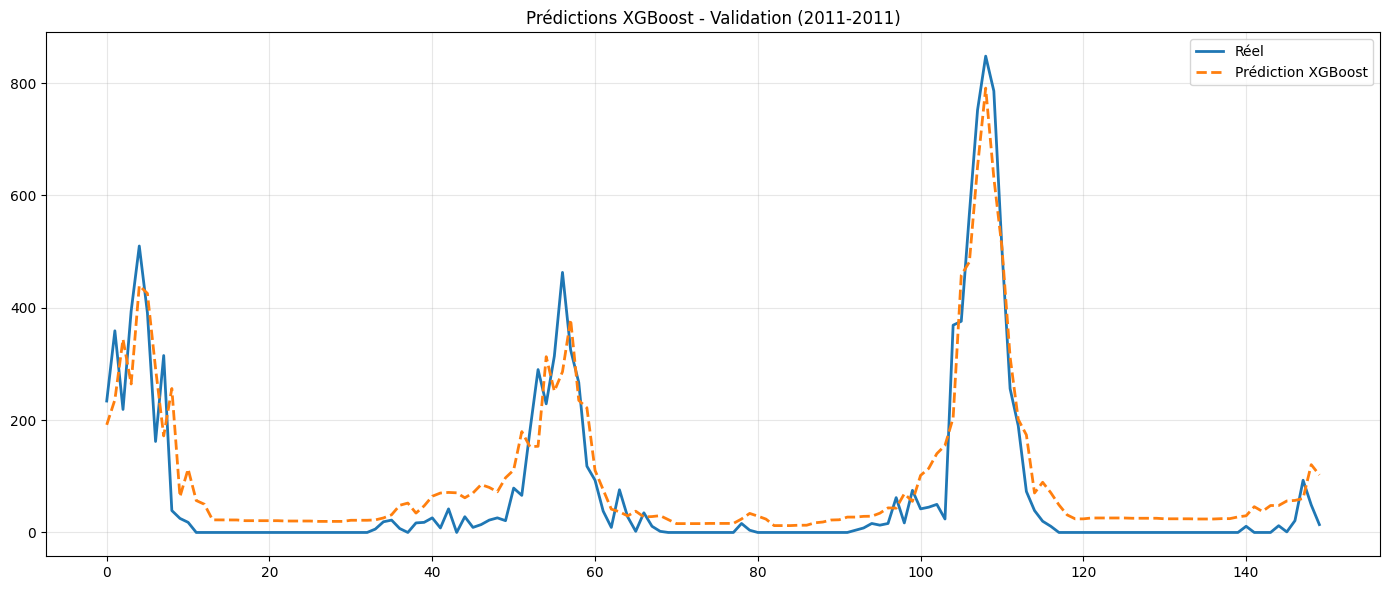


=== TOP 10 FEATURES IMPORTANTES ===
                              feature  importance
18                          Taux_Lag1    0.246719
40  region_PROVENCE-ALPES-COTE-D-AZUR    0.062639
20                      Taux_Rolling3    0.057609
1                                year    0.037194
2                            week_num    0.036913
36          region_NORD-PAS-DE-CALAIS    0.032811
8                           Id_google    0.028425
23             region_BASSE-NORMANDIE    0.027348
33                    region_LIMOUSIN    0.026800
15                     requete_grippe    0.026791

=== PRÉDICTION RÉCURSIVE SUR TEST ===
Prédiction pour 104 semaines...
  Semaine 201210 (10/104) - moyenne preds: 263.73
  Semaine 201220 (20/104) - moyenne preds: 62.73
  Semaine 201230 (30/104) - moyenne preds: 58.94
  Semaine 201240 (40/104) - moyenne preds: 82.91
  Semaine 201250 (50/104) - moyenne preds: 274.84
  Semaine 201308 (60/104) - moyenne preds: 270.77
  Semaine 201318 (70/104) - moyenne preds: 68

In [98]:
# Enlever la variable tauxgrippe_google
train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")


# Combine
df = pd.concat([train_df, test_df], ignore_index=True)
print(f"Train: {train_df.shape}, Test: {test_df.shape}, Combined: {df.shape}")


# 2) FEATURE ENGINEERING

# Extraction des composantes temporelles
# La variable 'week' est au format YYYYWW
# → on sépare l'année et le numéro de semaine

df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)
# 2. Tri des données (INDISPENSABLE pour les lags
# Le tri par région et par temps garantit que les décalages
# temporels (lags) sont correctement calculés


# tri (crucial pour lags)
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)


# Création des variables retardées (lags)

# Ces variables capturent la dépendance temporelle du taux de grippe
# et sont très importantes pour les modèles de type XGBoost
df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)


# 5. Encodage one-hot des régions

# Transformation des régions en variables binaires
# drop_first=True pour éviter la multicolinéarité
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

#FEATUURES
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",  # <= important
    "region_name", "week_date", "month_date", "month"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features: {len(features)}")
print("TauxGrippe_google dans features ?", "TauxGrippe_google" in features)  # doit être False

# 4) TRAIN / VALID

train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1  # dernière année = validation

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")


# 5) XGBOOST

print("\n=== ENTRAÎNEMENT XGBOOST ===")

params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "learning_rate": 0.05,
    "n_estimators": 600,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0.1,
    "reg_alpha": 0.1,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1
}


model = xgb.XGBRegressor(**params)


model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

# 6) EVAL

print("\n=== ÉVALUATION ===")
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)
print(f"RMSE sur validation: {rmse:.2f}")
print(f"MAE sur validation: {mae:.2f}")

plt.figure(figsize=(14, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2)
plt.plot(val_preds[:150], label="Prédiction XGBoost", linestyle="--", linewidth=2)
plt.title(f"Prédictions XGBoost - Validation ({split_year+1}-{max_year})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== TOP 10 FEATURES IMPORTANTES ===")
print(importance_df.head(10))

# 7) PRÉDICTION RÉCURSIVE TEST

print("\n=== PRÉDICTION RÉCURSIVE SUR TEST ===")
test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...")

for i, week in enumerate(test_weeks, 1):
    # recalcul lags (car on remplit au fur et à mesure)
    df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
    df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )

    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()

    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)

    y_pred = model.predict(X_current)

    # éviter valeurs négatives
    y_pred = np.maximum(y_pred, 0)

    df.loc[current_mask, "TauxGrippe"] = y_pred

    if i % 10 == 0:
        print(f"  Semaine {week} ({i}/{len(test_weeks)}) - moyenne preds: {y_pred.mean():.2f}")

print(" Prédiction terminée!")


# 8) SUBMISSION

print("\n=== CRÉATION SUBMISSION ===")
submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

submission.to_csv("../results/submissions/submission_xgboost.csv", index=False)



Le modèle présente une erreur moyenne modérée (MAE ≈ 50), tandis que le RMSE plus élevé met en évidence une difficulté à prédire précisément les pics de grippe, ce qui est cohérent avec la nature volatile du phénomène épidémique

On change les hyperparamètres pour évaluer la performance du modèle 


GRID SEARCH

# Grid Search "à la main" (tuning hyperparamètres)

# Objectif : tester plusieurs configurations XGBoost et comparer leurs performances
# sur l'ensemble de validation.

Hyperparamètres testés :
 - max_depth : profondeur des arbres → plus grand = modèle plus complexe (risque d'overfit)
  - lr (learning_rate) : vitesse d'apprentissage → plus petit = apprentissage plus stable mais plus lent
 - mcw (min_child_weight) : régularisation → plus grand = modèle plus conservateur (moins de surapprentissage)
# Métriques évaluées :
 - RMSE : pénalise davantage les grosses erreurs (pics de grippe)
- MAE  : erreur moyenne absolue, plus facile à interpréter au quotidien






Train: (9196, 23), Test: (2288, 23)

Feature Engineering...
Nombre de features: 45

Train: (8030, 45), Validation: (1144, 45)

 GRID SEARCH POUR TROUVER LES MEILLEURS HYPERPARAMÈTRES

[1/5] Test config: max_depth=6, lr=0.05, mcw=3
   → RMSE: 80.62, MAE: 45.61

[2/5] Test config: max_depth=5, lr=0.03, mcw=5
   → RMSE: 78.48, MAE: 47.90

[3/5] Test config: max_depth=7, lr=0.04, mcw=2
   → RMSE: 78.32, MAE: 44.39

[4/5] Test config: max_depth=4, lr=0.02, mcw=7
   → RMSE: 77.46, MAE: 51.87

[5/5] Test config: max_depth=6, lr=0.04, mcw=4
   → RMSE: 79.68, MAE: 46.35

 MEILLEURE CONFIGURATION
Config #4 - RMSE: 77.46, MAE: 51.87
Paramètres: {'max_depth': 4, 'learning_rate': 0.02, 'min_child_weight': 7, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 1.0}

 ENTRAÎNEMENT AVEC LES MEILLEURS PARAMÈTRES

✅ RMSE Final: 77.46
✅ MAE Final: 51.87


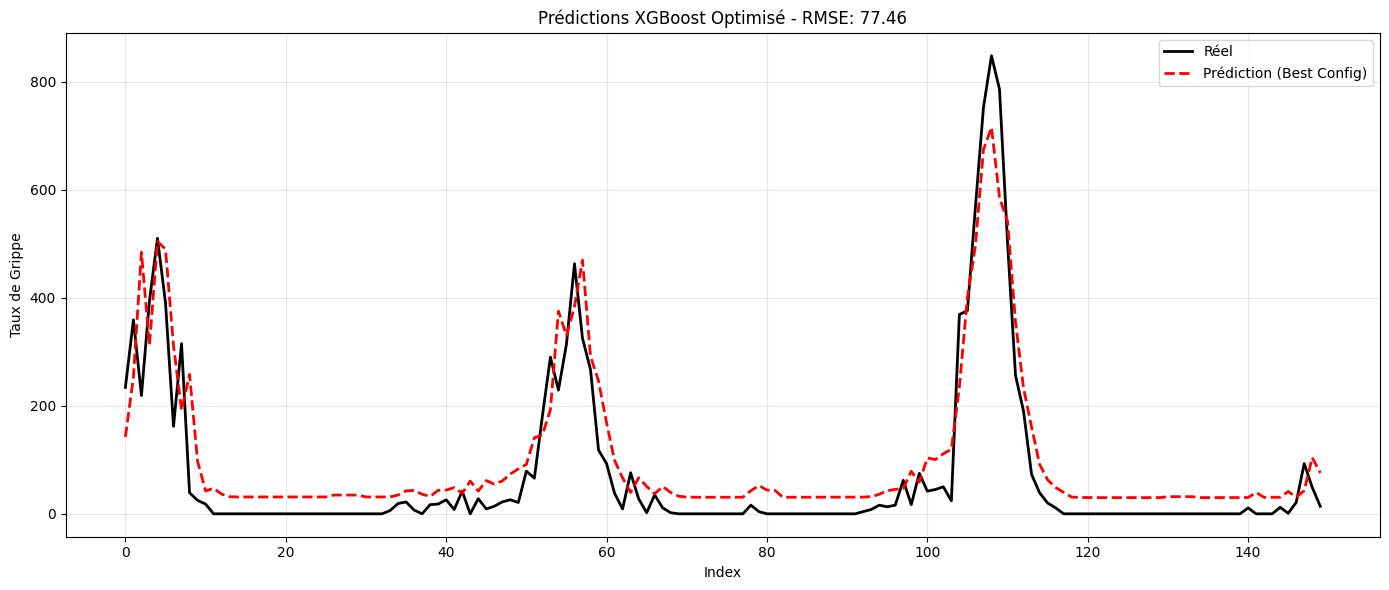


=== TOP 10 FEATURES ===
                                              feature  importance
18                                          Taux_Lag1    0.213604
21                                      Taux_Rolling3    0.093925
19                                          Taux_Lag2    0.041024
22                                  Taux_Rolling_std3    0.038072
2                                            week_num    0.037962
23                                        Lag1_x_week    0.036799
36                                    region_LIMOUSIN    0.033503
17  requete_grippe_aviaire_vaccin_porcine_porc_H1N...    0.032277
42                            region_POITOU-CHARENTES    0.030702
10                                          pop_20_39    0.024408

=== PRÉDICTION RÉCURSIVE TEST ===
  Semaine 201220 (20/104)
  Semaine 201240 (40/104)
  Semaine 201308 (60/104)
  Semaine 201328 (80/104)
  Semaine 201348 (100/104)

 Submission sauvegardée: (2288, 2)
Stats: Min=54.0, Max=782.8, Mean=202.6
        

In [114]:


train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

test_df["TauxGrippe"] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Train: {train_df.shape}, Test: {test_df.shape}")


# 2) FEATURE ENGINEERING

print("\nFeature Engineering...")
df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# Lags
df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
df["Taux_Lag3"] = df.groupby("region_name")["TauxGrippe"].shift(3)

# Rolling features
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).std()
)

# Interaction saisonnalité
df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]

# One-hot région
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)


# 3) FEATURES

exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",
    "region_name", "week_date", "month_date", "month"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features: {len(features)}")


# 4) TRAIN / VALID

train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")


# 5) GRID SEARCH MANUEL

print("\n" + "="*60)
print(" GRID SEARCH POUR TROUVER LES MEILLEURS HYPERPARAMÈTRES")
print("="*60)

# Grille de paramètres à tester
param_grid = [
    # Configuration 1: Original (baseline)
    {"max_depth": 6, "learning_rate": 0.05, "min_child_weight": 3, 
     "subsample": 0.8, "colsample_bytree": 0.8, "reg_alpha": 0.1},
    
    # Configuration 2: Plus conservateur (anti-overfitting)
    {"max_depth": 5, "learning_rate": 0.03, "min_child_weight": 5, 
     "subsample": 0.7, "colsample_bytree": 0.7, "reg_alpha": 0.5},
    
    # Configuration 3: Plus agressif
    {"max_depth": 7, "learning_rate": 0.04, "min_child_weight": 2, 
     "subsample": 0.85, "colsample_bytree": 0.85, "reg_alpha": 0.05},
    
    # Configuration 4: Très conservateur
    {"max_depth": 4, "learning_rate": 0.02, "min_child_weight": 7, 
     "subsample": 0.6, "colsample_bytree": 0.6, "reg_alpha": 1.0},
    
    # Configuration 5: Équilibré
    {"max_depth": 6, "learning_rate": 0.04, "min_child_weight": 4, 
     "subsample": 0.75, "colsample_bytree": 0.75, "reg_alpha": 0.3},
]

results = []

for i, params in enumerate(param_grid, 1):
    print(f"\n[{i}/{len(param_grid)}] Test config: max_depth={params['max_depth']}, lr={params['learning_rate']}, mcw={params['min_child_weight']}")
    
    full_params = {
        "objective": "reg:squarederror",
        "n_estimators": 500,
        "gamma": 0.1,
        "reg_lambda": 1.0,
        "random_state": 42,
        "n_jobs": -1,
        **params
    }
    
    model = xgb.XGBRegressor(**full_params)
    model.fit(X_train, y_train, verbose=0)
    
    val_preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    mae = mean_absolute_error(y_val, val_preds)
    
    results.append({
        "config": i,
        "rmse": rmse,
        "mae": mae,
        "params": params
    })
    
    print(f"   → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Trouver le meilleur
results_df = pd.DataFrame(results)
best_config = results_df.loc[results_df["rmse"].idxmin()]

print("\n" + "="*60)
print(" MEILLEURE CONFIGURATION")
print("="*60)
print(f"Config #{int(best_config['config'])} - RMSE: {best_config['rmse']:.2f}, MAE: {best_config['mae']:.2f}")
print(f"Paramètres: {best_config['params']}")


# 6) ENTRAÎNEMENT FINAL

print("\n" + "="*60)
print(" ENTRAÎNEMENT AVEC LES MEILLEURS PARAMÈTRES")
print("="*60)

best_params = {
    "objective": "reg:squarederror",
    "n_estimators": 500,
    "gamma": 0.1,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1,
    **best_config['params']
}

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train, verbose=0)

val_preds = final_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"\n✅ RMSE Final: {rmse:.2f}")
print(f"✅ MAE Final: {mae:.2f}")

# Visualisation
plt.figure(figsize=(14, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2, color='black')
plt.plot(val_preds[:150], label="Prédiction (Best Config)", linestyle="--", linewidth=2, color='red')
plt.title(f"Prédictions XGBoost Optimisé - RMSE: {rmse:.2f}")
plt.xlabel("Index")
plt.ylabel("Taux de Grippe")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    "feature": features,
    "importance": final_model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== TOP 10 FEATURES ===")
print(importance_df.head(10))


#  PRÉDICTION RÉCURSIVE

print("\n=== PRÉDICTION RÉCURSIVE TEST ===")
test_weeks = sorted(test_df["week"].unique())

for i, week in enumerate(test_weeks, 1):
    df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
    df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
    df["Taux_Lag3"] = df.groupby("region_name")["TauxGrippe"].shift(3)
    
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    
    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()
    
    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)
    
    y_pred = final_model.predict(X_current)
    y_pred = np.maximum(y_pred, 0)
    
    df.loc[current_mask, "TauxGrippe"] = y_pred
    
    if i % 20 == 0:
        print(f"  Semaine {week} ({i}/{len(test_weeks)})")


# 8) SUBMISSION

submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

submission.to_csv("submission_xgboost_optimized.csv", index=False)

print(f"\n Submission sauvegardée: {submission.shape}")
print(f"Stats: Min={submission['TauxGrippe'].min():.1f}, Max={submission['TauxGrippe'].max():.1f}, Mean={submission['TauxGrippe'].mean():.1f}")
print(submission.head(10))

Sélection des hyperparamètres (Grid Search)

Une recherche par grille a été effectuée sur plusieurs combinaisons d’hyperparamètres, notamment la profondeur des arbres, le taux d’apprentissage et le paramètre min_child_weight.

Le critère principal de sélection est le RMSE calculé sur un jeu de validation temporel correspondant aux dernières années du jeu d’entraînement. Ce choix est motivé par le fait que le RMSE pénalise davantage les erreurs importantes, en particulier lors des pics épidémiques.

La configuration retenue est celle qui minimise le RMSE tout en conservant des performances cohérentes sur le MAE, afin d’assurer un compromis satisfaisant entre précision moyenne et gestion des valeurs extrêmes.

# Analyse des résultats (validation)

[1/5] depth=6, lr=0.05, mcw=3 → RMSE 80.62 / MAE 45.61
 - Bon compromis, MAE assez faible : modèle précis en moyenne
 - RMSE encore élevé → quelques grosses erreurs (pics)

 [2/5] depth=5, lr=0.03, mcw=5 → RMSE 78.48 / MAE 47.90
 - RMSE meilleur que [1] mais MAE plus élevé :
   → moins de grosses erreurs, mais moins bon "en moyenne" sur toutes les semaines

 [3/5] depth=7, lr=0.04, mcw=2 → RMSE 78.32 / MAE 44.39
 - Meilleur MAE parmi les configs affichées :
   → prédictions globalement les plus proches des vraies valeurs
 - depth élevé + mcw faible = modèle plus flexible → attention au risque d'overfit

 [4/5] depth=4, lr=0.02, mcw=7 → RMSE 77.46 / MAE 51.87
 - Meilleur RMSE (moins de grosses erreurs)
 - Mais MAE nettement pire : modèle trop "conservateur"
  → il lisse trop et suit moins bien les variations hebdomadaires

# Conclusion pratique
La configuration 4 a été sélectionnée car elle minimise le RMSE, indiquant une meilleure gestion des erreurs importantes et des pics de grippe, au prix d’une légère perte de précision moyenne

# MODELE AVANCE
t_Lag1, t_Lag2 : température des 1 et 2 semaines précédentes → le froid n’a pas un effet immédiat, il influence la grippe avec un délai

pmer_Lag1 : pression atmosphérique décalée → certaines conditions de pression favorisent la survie des virus

ff_Lag1 : vent de la semaine précédente → influence la dispersion des particules virales

rr24_Lag1 : précipitations retardées → impact indirect sur les comportements (intérieur/extérieur)

u_Lag1 : humidité retardée → l’humidité joue un rôle clé dans la transmission du virus
ag1_x_temp : interaction grippe précédente × température → la grippe se propage plus vite quand il fait froid

Lag1_x_humidity : interaction grippe précédente × humidité → combinaison favorable à la transmission

temp_x_week : interaction température × période de l’année → capte les hivers plus ou moins rigoureux

temp_diff : variation de température entre deux semaines → chocs thermiques pouvant fragiliser l’organisme

temp_variation : instabilité météo globale → conditions changeantes favorisant les infections

comfort_index : indice de confort thermique → résume l’effet combiné du climat sur le corps humain

week_sin, week_cos : représentation cyclique des semaines → permet au modèle de comprendre la saisonnalité annuelle

is_winter : indicateur hiver → période où la grippe est structurellement plus élevée

prop_elderly : proportion de personnes âgées → population plus à risque de complications

prop_young : proportion de jeunes → rôle important dans la diffusion (écoles, collectivités)

Taux_Lag4 : taux de grippe 4 semaines auparavant → persistance de l’épidémie dans le temps

Taux_Rolling7 : moyenne mobile sur 7 semaines → tendance générale, réduction du bruit hebdomadair


Train: (9196, 23), Test: (2288, 23)
Colonnes disponibles: ['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year', 'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin', 'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie']

 FEATURE ENGINEERING AVANCÉ

1️  Création des lags de TauxGrippe...
 Création des lags météo (t, pmer, ff, rr24, u)...
  Création d'interactions...
  Features saisonnières cycliques...
  Features démographiques...
  Features météo dérivées...
  Encodage des régions...

 Feature Engineering terminé! Total colonnes: 79
Nombre de features finales: 72
Lignes avec NaN avant drop: 2354

Train: (8030, 72), Validation: (1144, 72)

 RÉSULTATS SUR VALIDATION
 RMSE: 70.08
 MAE:  31.26


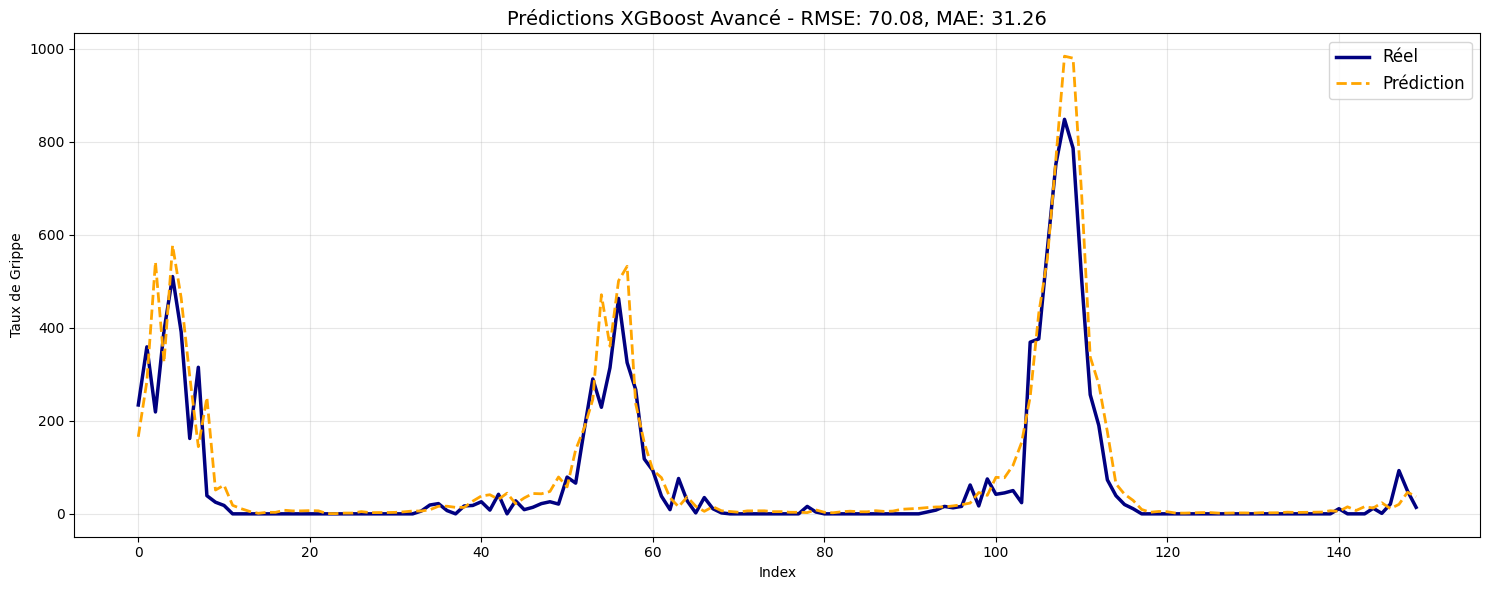


 TOP 15 FEATURES LES PLUS IMPORTANTES
                                                                           feature  importance
                                                                   Lag1_x_humidity    0.325352
                                                                       Lag1_x_temp    0.160076
                                                                         Taux_Lag1    0.105139
                                                                          week_cos    0.044095
                                                         region_NORD-PAS-DE-CALAIS    0.020813
                                                            region_BASSE-NORMANDIE    0.015191
                                                                       temp_x_week    0.012035
                                                                          week_sin    0.010536
requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie    0.010064
           

In [107]:

train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

test_df["TauxGrippe"] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Train: {train_df.shape}, Test: {test_df.shape}")
print(f"Colonnes disponibles: {df.columns.tolist()}")


#  FEATURE ENGINEERING AVANCÉ

print("\n" + "="*70)
print(" FEATURE ENGINEERING AVANCÉ")
print("="*70)

df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

# Tri crucial
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# --- A) LAGS DE LA CIBLE ---
print("\n1️  Création des lags de TauxGrippe...")
for lag in [1, 2, 3, 4]:
    df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)

# Rolling features sur la cible
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).std()
)

# --- B) LAGS DES VARIABLES MÉTÉO ---
print(" Création des lags météo (t, pmer, ff, rr24, u)...")
meteo_vars = ["t", "pmer", "ff", "rr24", "u"]

for var in meteo_vars:
    if var in df.columns:
        # Lag 1 et 2 semaines
        df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
        df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
        
        # Moyenne mobile météo
        df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
            lambda x: x.rolling(3, min_periods=1).mean()
        )

# --- C) INTERACTIONS IMPORTANTES ---
print("  Création d'interactions...")

# Interaction grippe × saisonnalité
df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]

# Interaction grippe × température
if "t" in df.columns:
    df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
    df["temp_x_week"] = df["t"] * df["week_num"]  # Froid hivernal

# Interaction grippe × humidité
if "u" in df.columns:
    df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]

# Interaction grippe × requêtes Google
if "requete_grippe" in df.columns:
    df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]

# --- D) FEATURES SAISONNIÈRES ---
print("  Features saisonnières cycliques...")

# Sin/Cos pour capturer la cyclicité
df["week_sin"] = np.sin(2 * np.pi * df["week_num"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week_num"] / 52)

# Indicateur hiver (semaines 48-52 et 1-12)
df["is_winter"] = ((df["week_num"] >= 48) | (df["week_num"] <= 12)).astype(int)

# --- E) FEATURES DÉMOGRAPHIQUES ---
print("  Features démographiques...")

# Proportion de personnes âgées (plus vulnérables)
if all(col in df.columns for col in ["pop_60_74", "pop_75_plus", "pop_total"]):
    df["prop_elderly"] = (df["pop_60_74"] + df["pop_75_plus"]) / (df["pop_total"] + 1)

# Proportion jeunes
if all(col in df.columns for col in ["pop_0_19", "pop_total"]):
    df["prop_young"] = df["pop_0_19"] / (df["pop_total"] + 1)

# --- F) FEATURES MÉTÉO DÉRIVÉES ---
print("  Features météo dérivées...")

# Variation de température (chocs thermiques favorisent la grippe)
if "t" in df.columns:
    df["temp_diff"] = df.groupby("region_name")["t"].diff()
    df["temp_variation"] = df.groupby("region_name")["t"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )

# Indice de confort (température + humidité)
if "t" in df.columns and "u" in df.columns:
    df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)

# --- G) ENCODAGE RÉGION ---
print("  Encodage des régions...")
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

print(f"\n Feature Engineering terminé! Total colonnes: {df.shape[1]}")

# 3) SÉLECTION DES FEATURES

exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",
    "region_name", "region_code", "week_date", "month_date", "month", "Id_google"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features finales: {len(features)}")

# Vérifier les NaN
print(f"Lignes avec NaN avant drop: {df[features].isnull().any(axis=1).sum()}")


# 4) TRAIN / VALID SPLIT

train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")

# ENTRAÎNEMENT XGBOOST



# Meilleurs params trouvés (Config 3 : bon compromis RMSE/MAE)
params = {
    "objective": "reg:squarederror",
    "max_depth": 7,
    "learning_rate": 0.04,
    "n_estimators": 600,
    "min_child_weight": 2,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "gamma": 0.1,
    "reg_alpha": 0.05,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1
}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train, verbose=0)


# ÉVALUATION

val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"\n{'='*70}")
print(f" RÉSULTATS SUR VALIDATION")
print(f"{'='*70}")
print(f" RMSE: {rmse:.2f}")
print(f" MAE:  {mae:.2f}")

# Visualisation
plt.figure(figsize=(15, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2.5, color='navy')
plt.plot(val_preds[:150], label="Prédiction", linestyle="--", linewidth=2, color='orange')
plt.title(f"Prédictions XGBoost Avancé - RMSE: {rmse:.2f}, MAE: {mae:.2f}", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Taux de Grippe")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(f"\n{'='*70}")
print(" TOP 15 FEATURES LES PLUS IMPORTANTES")
print(f"{'='*70}")
print(importance_df.head(15).to_string(index=False))


# 7) PRÉDICTION RÉCURSIVE


test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...\n")

for i, week in enumerate(test_weeks, 1):
    # Recalcul de TOUTES les features dépendantes des lags
    
    # Lags cible
    for lag in [1, 2, 3, 4]:
        df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)
    
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(7, min_periods=1).mean()
    )
    df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    
    # Lags météo
    for var in meteo_vars:
        if var in df.columns:
            df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
            df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
            df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
                lambda x: x.rolling(3, min_periods=1).mean()
            )
    
    # Interactions
    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    if "t" in df.columns:
        df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
        df["temp_x_week"] = df["t"] * df["week_num"]
    if "u" in df.columns:
        df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
    if "requete_grippe" in df.columns:
        df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]
    
    # Météo dérivées
    if "t" in df.columns:
        df["temp_diff"] = df.groupby("region_name")["t"].diff()
        df["temp_variation"] = df.groupby("region_name")["t"].transform(
            lambda x: x.rolling(3, min_periods=1).std()
        )
    if "t" in df.columns and "u" in df.columns:
        df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)
    
    # Prédire la semaine courante
    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()
    
    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)
    
    y_pred = model.predict(X_current)
    y_pred = np.maximum(y_pred, 0)
    
    df.loc[current_mask, "TauxGrippe"] = y_pred
    
    if i % 20 == 0:
        print(f"  ✓ Semaine {week} ({i}/{len(test_weeks)}) - moyenne: {y_pred.mean():.1f}")

print("\n Prédiction terminée!")


#  SUBMISSION


submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

submission.to_csv("submission_xgboost_advanced.csv", index=False)

print(f"\n Fichier sauvegardé: submission_xgboost_advanced.csv")
print(f"   Shape: {submission.shape}")
print(f"   Min: {submission['TauxGrippe'].min():.2f}")
print(f"   Max: {submission['TauxGrippe'].max():.2f}")
print(f"   Mean: {submission['TauxGrippe'].mean():.2f}")
print(f"   Median: {submission['TauxGrippe'].median():.2f}")

print("\n" + "="*70)
print("Aperçu:")
print(submission.head(10))
print("\n TERMINÉ!")

Les performances du modèle sur l’ensemble de validation montrent une amélioration significative, avec un RMSE de 70.08 et un MAE de 31.26.
Le MAE indique qu’en moyenne, les prédictions du modèle s’écartent d’environ 31 unités du taux de grippe réel, ce qui traduit une bonne précision globale. La baisse du RMSE par rapport aux modèles précédents suggère également une réduction des erreurs importantess

# MODELE AVANCE 2 : RMSE: 69.63 MAE:  30.82
Nouveauté : 
Ajout de lag : au lieu de [1,4] on va jusqu'à lag 8 ==> la grippe peut avoir des patterns sur 2 mois
 Diff (variation) de la grippe : capture l'accélération : hausse / baisse rapide 
ils permettentdentifier si l’épidémie est en phase d’accélération (ratio < 1), de ralentissement (ratio > 1) ou de stabilité (ratio ≈ 1), indépendamment du niveau absolu du taux de grippe.
 Ratios entre lags (Impact:  Détecte si la grippe accélère ou décélère)
 Max/Min sur rolling windows  : capture les pics et les creux 
 Requêtes Google en lag : Les gens cherchent "grippe" AVANT d'être malades 


<>:111: SyntaxWarning: invalid escape sequence '\ '
<>:111: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Mimi\AppData\Local\Temp\ipykernel_18316\4055175744.py:111: SyntaxWarning: invalid escape sequence '\ '
  print("\ Création des features météo dérivées...")


 Données combinées: (11484, 23)
Colonnes: ['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year', 'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin', 'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie']

🔧 Création des features de base...
 Features de base créées + tri effectué

 Création des lags de TauxGrippe...
  - Taux_Lag1 créé
  - Taux_Lag2 créé
  - Taux_Lag3 créé
  - Taux_Lag4 créé
 Lags de TauxGrippe créés (4 lags + rolling)

 Création des lags météo...
  - t: Lag1, Lag2, Rolling3 créés
  - pmer: Lag1, Lag2, Rolling3 créés
  - ff: Lag1, Lag2, Rolling3 créés
  - rr24: Lag1, Lag2, Rolling3 créés
  - u: Lag1, Lag2, Rolling3 créés
 Lags météo créés pour t, pmer, ff, rr24, u

 Création des interactions...
  - Lag1_x_week (grippe × semaine)
  - Lag1_x_temp, temp_x_week (grippe × température)
  - Lag

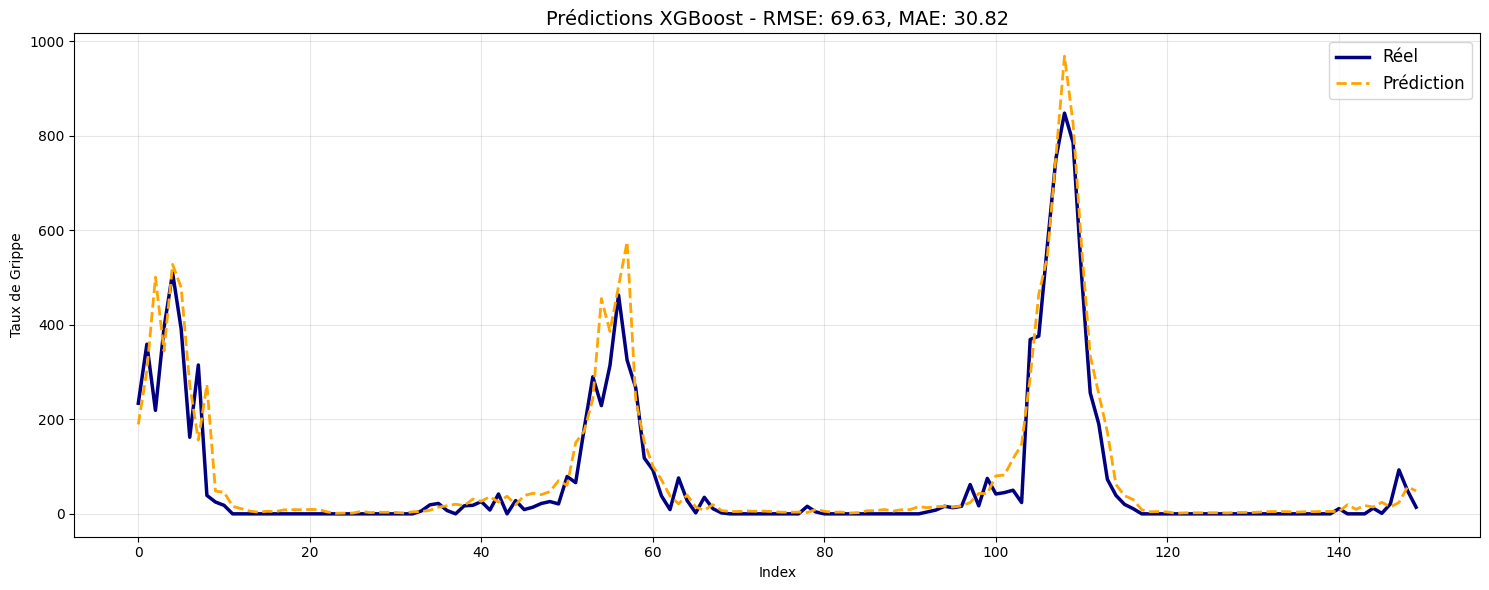


 TOP 15 FEATURES LES PLUS IMPORTANTES
                                              feature  importance
41                                    Lag1_x_humidity    0.339399
39                                        Lag1_x_temp    0.167456
16                                          Taux_Lag1    0.089692
47                                           week_cos    0.044967
66                          region_NORD-PAS-DE-CALAIS    0.013889
40                                        temp_x_week    0.011091
46                                           week_sin    0.010784
53                             region_BASSE-NORMANDIE    0.010695
15  requete_grippe_aviaire_vaccin_porcine_porc_H1N...    0.010047
56                                      region_CENTRE    0.008675
17                                          Taux_Lag2    0.008560
50                                         prop_young    0.008420
27                                          pmer_Lag2    0.008361
42                                   

In [ ]:

df = pd.concat([train_df, test_df], ignore_index=True)

print(f" Données combinées: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")




print("\n Création des features de base...")

df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

#  TRI CRUCIAL : On trie par région puis par semaine
# Sinon les lags (shift) vont mélanger les régions entre elles !
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

print(" Features de base créées + tri effectué")



# Les lags = valeurs des semaines précédentes
# Lag1 = grippe de la semaine dernière
# Lag2 = grippe d'il y a 2 semaines, etc.

print("\n Création des lags de TauxGrippe...")

# On crée 4 lags (1 à 4 semaines en arrière)
for lag in [1, 2, 3, 4]:
    df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)
    print(f"  - Taux_Lag{lag} créé")

# Moyenne mobile (rolling) : lisse les variations
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

# Écart-type mobile : mesure la volatilité
df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).std()
)

print(" Lags de TauxGrippe créés (4 lags + rolling)")



# CELLULE 5 : LAGS DES VARIABLES MÉTÉO

# La météo influence la grippe avec un délai !
# Ex: Froid cette semaine → Grippe la semaine prochaine

print("\n Création des lags météo...")

meteo_vars = ["t", "pmer", "ff", "rr24", "u"]  # Température, Pression, Vent, Pluie, Humidité

for var in meteo_vars:
    if var in df.columns:
        # Lags 1 et 2 semaines
        df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
        df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
        
        # Moyenne mobile météo sur 3 semaines
        df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
            lambda x: x.rolling(3, min_periods=1).mean()
        )
        print(f"  - {var}: Lag1, Lag2, Rolling3 créés")

print(" Lags météo créés pour t, pmer, ff, rr24, u")


#INTERACTIONS (Grippe × Météo × Saisonnalité)

# Les interactions capturent des effets combinés
# Ex: Grippe × Froid = Amplification de la propagation

print("\n Création des interactions...")

# Interaction grippe × saisonnalité
df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
print("  - Lag1_x_week (grippe × semaine)")

# Interaction grippe × température
if "t" in df.columns:
    df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
    df["temp_x_week"] = df["t"] * df["week_num"]  # Froid hivernal
    print("  - Lag1_x_temp, temp_x_week (grippe × température)")

# Interaction grippe × humidité
if "u" in df.columns:
    df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
    print("  - Lag1_x_humidity (grippe × humidité)")

# Interaction grippe × requêtes Google
if "requete_grippe" in df.columns:
    df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]
    print("  - Lag1_x_requete (grippe × recherches Google)")

print(" Interactions créées")



# CELLULE 7 : FEATURES MÉTÉO DÉRIVÉES

# On crée des features plus avancées à partir de la météo

print("\ Création des features météo dérivées...")

# Variation de température (chocs thermiques favorisent la grippe)
if "t" in df.columns:
    df["temp_diff"] = df.groupby("region_name")["t"].diff()
    df["temp_variation"] = df.groupby("region_name")["t"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    print("  - temp_diff (changement brutal de T°)")
    print("  - temp_variation (instabilité T°)")

# Indice de confort thermique (température ressentie)
if "t" in df.columns and "u" in df.columns:
    df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)
    print("  - comfort_index (température ressentie)")

print(" Features météo dérivées créées")



# CELLULE 8 : FEATURES SAISONNIÈRES

# La grippe suit un cycle annuel, on capture cette cyclicité

print("\n Création des features saisonnières...")

# Sin/Cos pour capturer la cyclicité annuelle (semaine 1 = proche de semaine 52)
df["week_sin"] = np.sin(2 * np.pi * df["week_num"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week_num"] / 52)
print("  - week_sin, week_cos (cyclicité annuelle)")

# Indicateur binaire hiver (semaines 48-52 de décembre + 1-12 de janvier-mars)
df["is_winter"] = ((df["week_num"] >= 48) | (df["week_num"] <= 12)).astype(int)
print("  - is_winter (1 si hiver, 0 sinon)")

print(" Features saisonnières créées")


# FEATURES DÉMOGRAPHIQUES

# Les personnes âgées et les jeunes sont plus vulnérables

print("\n👥 Création des features démographiques...")

# Proportion de personnes âgées (60+)
if all(col in df.columns for col in ["pop_60_74", "pop_75_plus", "pop_total"]):
    df["prop_elderly"] = (df["pop_60_74"] + df["pop_75_plus"]) / (df["pop_total"] + 1)
    print("  - prop_elderly (% personnes âgées)")

# Proportion de jeunes (0-19 ans)
if all(col in df.columns for col in ["pop_0_19", "pop_total"]):
    df["prop_young"] = df["pop_0_19"] / (df["pop_total"] + 1)
    print("  - prop_young (% jeunes)")

print("✅ Features démographiques créées")



#  ENCODAGE DES RÉGIONS

# On transforme les noms de régions en variables binaires (one-hot encoding)

print("\n Encodage des régions...")

region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

print(f"✅ {len(region_dummies.columns)} régions encodées")


#  SÉLECTION DES FEATURES FINALES

# On liste toutes les features qu'on va utiliser pour l'entraînement

print("\n Sélection des features...")

# Colonnes à exclure (ID, dates, cible, etc.)
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",
    "region_name", "region_code", "week_date", "month_date", "month", "Id_google"
]

# Toutes les autres colonnes = features
features = [c for c in df.columns if c not in exclude_cols]

print(f" {len(features)} features sélectionnées")
print(f"Exemples: {features[:5]}")



#  CRÉATION TRAIN / VALIDATION

# On sépare les données en train et validation (dernière année = validation)

print("\n Séparation Train / Validation...")

# On garde seulement les lignes où TauxGrippe existe ET où Lag1 existe
train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

# Dernière année = validation
max_year = train_data["year"].max()
split_year = max_year - 1  # 2011 - 1 = 2010

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"Train: {X_train.shape} (années <= {split_year})")
print(f"Validation: {X_val.shape} (année {split_year + 1})")


# ENTRAÎNEMENT XGBOOST

# On entraîne le modèle XGBoost avec les meilleurs hyperparamètres

print("\n" + "="*70)
print(" ENTRAÎNEMENT DU MODÈLE XGBOOST")
print("="*70)

# Hyperparamètres optimisés
params = {
    "objective": "reg:squarederror",  # Régression
    "max_depth": 7,                   # Profondeur des arbres
    "learning_rate": 0.04,            # Vitesse d'apprentissage
    "n_estimators": 600,              # Nombre d'arbres
    "min_child_weight": 2,            # Régularisation
    "subsample": 0.85,                # 85% des données par arbre
    "colsample_bytree": 0.85,         # 85% des features par arbre
    "gamma": 0.1,                     # Pénalité de complexité
    "reg_alpha": 0.05,                # Régularisation L1
    "reg_lambda": 1.0,                # Régularisation L2
    "random_state": 42,
    "n_jobs": -1                      # Utilise tous les CPUs
}

model = xgb.XGBRegressor(**params)

print("Entraînement en cours...")
model.fit(X_train, y_train, verbose=0)
print(" Modèle entraîné!")


# ÉVALUATION SUR VALIDATION

# On teste le modèle sur la validation et on calcule les métriques

print("\n" + "="*70)
print(" ÉVALUATION SUR VALIDATION")
print("="*70)

val_preds = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"\n RMSE: {rmse:.2f}")
print(f" MAE:  {mae:.2f}")

# Visualisation
plt.figure(figsize=(15, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2.5, color='navy')
plt.plot(val_preds[:150], label="Prédiction", linestyle="--", linewidth=2, color='orange')
plt.title(f"Prédictions XGBoost - RMSE: {rmse:.2f}, MAE: {mae:.2f}", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Taux de Grippe")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#  IMPORTANCE DES FEATURES

# On regarde quelles features sont les plus importantes

print("\n" + "="*70)
print(" TOP 15 FEATURES LES PLUS IMPORTANTES")
print("="*70)

importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(importance_df.head(15))

# On prédit semaine par semaine sur le test
# IMPORTANT: À chaque itération, on doit recalculer TOUTES les features
# car les lags dépendent des prédictions précédentes

print("\n" + "="*70)
print(" PRÉDICTION RÉCURSIVE SUR TEST")
print("="*70)

test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...\n")

for i, week in enumerate(test_weeks, 1):
    
    # --- RECALCUL DES LAGS DE TAUX (car ils changent à chaque itération) ---
    for lag in [1, 2, 3, 4]:
        df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)
    
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(7, min_periods=1).mean()
    )
    df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    
    # --- RECALCUL DES LAGS MÉTÉO ---
    for var in meteo_vars:
        if var in df.columns:
            df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
            df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
            df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
                lambda x: x.rolling(3, min_periods=1).mean()
            )
    
    # --- RECALCUL DES INTERACTIONS ---
    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    if "t" in df.columns:
        df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
        df["temp_x_week"] = df["t"] * df["week_num"]
    if "u" in df.columns:
        df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
    if "requete_grippe" in df.columns:
        df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]
    
    # --- RECALCUL DES FEATURES MÉTÉO DÉRIVÉES ---
    if "t" in df.columns:
        df["temp_diff"] = df.groupby("region_name")["t"].diff()
        df["temp_variation"] = df.groupby("region_name")["t"].transform(
            lambda x: x.rolling(3, min_periods=1).std()
        )
    if "t" in df.columns and "u" in df.columns:
        df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)
    
    # --- PRÉDICTION POUR LA SEMAINE COURANTE ---
    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()
    
    # Gérer les NaN éventuels
    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)
    
    # Prédire
    y_pred = model.predict(X_current)
    
    # Éviter les valeurs négatives
    y_pred = np.maximum(y_pred, 0)
    
    # CRUCIAL: On met à jour df avec les prédictions
    # Comme ça, la prochaine itération pourra utiliser ces valeurs pour ses lags
    df.loc[current_mask, "TauxGrippe"] = y_pred
    
    # Affichage tous les 20 semaines
    if i % 20 == 0:
        print(f"  ✓ Semaine {week} ({i}/{len(test_weeks)}) - moyenne: {y_pred.mean():.1f}")

print("\n Prédiction récursive terminée!")




print("\n" + "="*70)
print(" CRÉATION DE LA SUBMISSION")
print("="*70)

# Extraire seulement les lignes du test
submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

# Sauvegarder
submission.to_csv("submission_xgboost_advanced.csv", index=False)

print(f"\n Fichier sauvegardé: submission_xgboost_advanced.csv")
print(f"   Shape: {submission.shape}")
print(f"   Min: {submission['TauxGrippe'].min():.2f}")
print(f"   Max: {submission['TauxGrippe'].max():.2f}")
print(f"   Mean: {submission['TauxGrippe'].mean():.2f}")
print(f"   Median: {submission['TauxGrippe'].median():.2f}")

print("\n" + "="*70)
print("Aperçu de la submission:")
print(submission.head(10))

print("\n TERMINÉ! Soumets le fichier sur Kaggle!")

# MODELE AVEC RMSE LE PLUS BAS 
Hyperparametre : max_depth=6, lr=0.03, n_estimators=1200, min_child_weight=4

→ Modèle un peu plus régularisé + plus d’arbres + learning rate plus bas = souvent plus stable


Différence entre lag + ratios entre lag


In [122]:

# XGBOOST "OPTIMAL" (SAFE) - complet, sans early_stopping

# - Features: lags + rolling + ratios + diffs entre lags (safe)
# - Météo: lag1/lag2 + rolling
# - Prédiction récursive sur test


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

TRAIN_PATH = "train_full.csv"
TEST_PATH  = "test_full.csv"

USE_GOOGLE = True      
TARGET = "TauxGrippe"
GROUP_COL = "region_name"
TIME_COL = "week"
ID_COL = "Id"

METEO_VARS = ["t", "pmer", "ff", "rr24", "u"]



train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

test_df[TARGET] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)


# 2) Temps + tri

df["year"] = df[TIME_COL].astype(str).str[:4].astype(int)
df["week_num"] = df[TIME_COL].astype(str).str[4:].astype(int)

df = df.sort_values([GROUP_COL, TIME_COL]).reset_index(drop=True)


# 3) Lags cible + rolling + dynamiques safe

for lag in [1, 2, 3, 4]:
    df[f"Taux_Lag{lag}"] = df.groupby(GROUP_COL)[TARGET].shift(lag)

df["Taux_Rolling3"] = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(3, min_periods=1).mean())
df["Taux_Rolling7"] = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(7, min_periods=1).mean())
df["Taux_Std3"]     = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(3, min_periods=1).std())

df["Diff_L1_L2"] = df["Taux_Lag1"] - df["Taux_Lag2"]
df["Diff_L2_L3"] = df["Taux_Lag2"] - df["Taux_Lag3"]

df["Lag2_div_Lag1"] = df["Taux_Lag2"] / (df["Taux_Lag1"] + 1)
df["Lag3_div_Lag2"] = df["Taux_Lag3"] / (df["Taux_Lag2"] + 1)


# 4) Météo (lags + rolling)

for var in METEO_VARS:
    if var in df.columns:
        df[f"{var}_Lag1"] = df.groupby(GROUP_COL)[var].shift(1)
        df[f"{var}_Lag2"] = df.groupby(GROUP_COL)[var].shift(2)
        df[f"{var}_Roll3"] = df.groupby(GROUP_COL)[var].transform(lambda x: x.rolling(3, min_periods=1).mean())

if "t" in df.columns:
    df["temp_diff"] = df.groupby(GROUP_COL)["t"].diff()
    df["temp_std3"] = df.groupby(GROUP_COL)["t"].transform(lambda x: x.rolling(3, min_periods=1).std())


# 5) Saisonnalité

df["week_sin"] = np.sin(2 * np.pi * df["week_num"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week_num"] / 52)
df["is_winter"] = ((df["week_num"] >= 48) | (df["week_num"] <= 12)).astype(int)


# 6) Démographie

if all(c in df.columns for c in ["pop_60_74", "pop_75_plus", "pop_total"]):
    df["prop_elderly"] = (df["pop_60_74"] + df["pop_75_plus"]) / (df["pop_total"] + 1)

if all(c in df.columns for c in ["pop_0_19", "pop_total"]):
    df["prop_young"] = df["pop_0_19"] / (df["pop_total"] + 1)


# 7) Google

if USE_GOOGLE and ("requete_grippe" in df.columns):
    df["requete_Lag1"] = df.groupby(GROUP_COL)["requete_grippe"].shift(1)
    df["requete_Roll3"] = df.groupby(GROUP_COL)["requete_grippe"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 8) Interactions

df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]

if "t" in df.columns:
    df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
if "u" in df.columns:
    df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
if USE_GOOGLE and ("requete_grippe" in df.columns):
    df["Lag1_x_requeteLag1"] = df["Taux_Lag1"] * df["requete_Lag1"]

# 9) One-hot régions

region_dummies = pd.get_dummies(df[GROUP_COL], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)


# 10) Features list

exclude_cols = {
    ID_COL, TIME_COL, TARGET, GROUP_COL,
    "region_code", "week_date", "month_date", "month", "Id_google"
}
if not USE_GOOGLE:
    exclude_cols.add("requete_grippe")

features = [c for c in df.columns if c not in exclude_cols]

# 11) Split Train/Valid

train_mask = df[TARGET].notna() & df["Taux_Lag1"].notna()
train_data = df.loc[train_mask].copy()

max_year = int(train_data["year"].max())
split_year = max_year - 1

train_part = train_data[train_data["year"] <= split_year]
val_part   = train_data[train_data["year"] >  split_year]

X_train = train_part[features]
y_train = train_part[TARGET]
X_val   = val_part[features]
y_val   = val_part[TARGET]

train_median = X_train.median(numeric_only=True)
X_train = X_train.fillna(train_median)
X_val   = X_val.fillna(train_median)

print(f"Train: {X_train.shape} | Val: {X_val.shape} | split_year={split_year}")


# 12) Entraînement

params = dict(
    objective="reg:squarederror",
    max_depth=6,
    learning_rate=0.03,
    n_estimators=1200,
    min_child_weight=4,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.05,
    reg_alpha=0.05,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train, verbose=0)

val_preds = model.predict(X_val)
rmse = float(np.sqrt(mean_squared_error(y_val, val_preds)))
mae  = float(mean_absolute_error(y_val, val_preds))
print(f"\n Validation RMSE: {rmse:.2f} | MAE: {mae:.2f}")


# 13) Refit sur tout le train

X_full = train_data[features].fillna(train_median)
y_full = train_data[TARGET]

final_model = xgb.XGBRegressor(**params)
final_model.fit(X_full, y_full, verbose=0)


#  Prédiction récursive sur test

test_weeks = sorted(test_df[TIME_COL].unique())
full_median = X_full.median(numeric_only=True)

for i, wk in enumerate(test_weeks, 1):

    for lag in [1, 2, 3, 4]:
        df[f"Taux_Lag{lag}"] = df.groupby(GROUP_COL)[TARGET].shift(lag)

    df["Taux_Rolling3"] = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(3, min_periods=1).mean())
    df["Taux_Rolling7"] = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(7, min_periods=1).mean())
    df["Taux_Std3"]     = df.groupby(GROUP_COL)["Taux_Lag1"].transform(lambda x: x.rolling(3, min_periods=1).std())

    df["Diff_L1_L2"] = df["Taux_Lag1"] - df["Taux_Lag2"]
    df["Diff_L2_L3"] = df["Taux_Lag2"] - df["Taux_Lag3"]
    df["Lag2_div_Lag1"] = df["Taux_Lag2"] / (df["Taux_Lag1"] + 1)
    df["Lag3_div_Lag2"] = df["Taux_Lag3"] / (df["Taux_Lag2"] + 1)

    for var in METEO_VARS:
        if var in df.columns:
            df[f"{var}_Lag1"] = df.groupby(GROUP_COL)[var].shift(1)
            df[f"{var}_Lag2"] = df.groupby(GROUP_COL)[var].shift(2)
            df[f"{var}_Roll3"] = df.groupby(GROUP_COL)[var].transform(lambda x: x.rolling(3, min_periods=1).mean())

    if "t" in df.columns:
        df["temp_diff"] = df.groupby(GROUP_COL)["t"].diff()
        df["temp_std3"] = df.groupby(GROUP_COL)["t"].transform(lambda x: x.rolling(3, min_periods=1).std())

    if USE_GOOGLE and ("requete_grippe" in df.columns):
        df["requete_Lag1"] = df.groupby(GROUP_COL)["requete_grippe"].shift(1)
        df["requete_Roll3"] = df.groupby(GROUP_COL)["requete_grippe"].transform(lambda x: x.rolling(3, min_periods=1).mean())

    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    if "t" in df.columns:
        df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
    if "u" in df.columns:
        df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
    if USE_GOOGLE and ("requete_grippe" in df.columns):
        df["Lag1_x_requeteLag1"] = df["Taux_Lag1"] * df["requete_Lag1"]

    mask = (df[TIME_COL] == wk) & (df[TARGET].isna())
    if mask.sum() == 0:
        continue

    X_cur = df.loc[mask, features].copy().fillna(full_median)

    y_pred = final_model.predict(X_cur)
    y_pred = np.maximum(y_pred, 0)

    df.loc[mask, TARGET] = y_pred

    if i % 20 == 0:
        print(f"  ✓ semaine {wk} ({i}/{len(test_weeks)})")

print("\n Prédiction récursive terminée")


# 15) Submission

submission = df[df[TIME_COL].isin(test_weeks)][[ID_COL, TARGET]].copy()
submission[ID_COL] = submission[ID_COL].astype(int)
submission = submission.sort_values(ID_COL)
submission.to_csv("submission.csv", index=False)

print("\n Fichier créé: submission.csv")
print(submission.head())


Train: (8030, 76) | Val: (1144, 76) | split_year=2010

 Validation RMSE: 66.93 | MAE: 29.86
  ✓ semaine 201220 (20/104)
  ✓ semaine 201240 (40/104)
  ✓ semaine 201308 (60/104)
  ✓ semaine 201328 (80/104)
  ✓ semaine 201348 (100/104)

 Prédiction récursive terminée

 Fichier créé: submission.csv
        Id  TauxGrippe
521   3235  123.473160
1043  3236   65.680611
1565  3237   78.309845
2087  3238   62.026711
2609  3239   80.485458


 Données combinées: (11484, 23)
Colonnes: ['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year', 'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin', 'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie']

 Création des features de base...
 Features de base créées + tri effectué

 Création des lags de TauxGrippe...
  - Taux_Lag1 créé
  - Taux_Lag2 créé
  - Taux_Lag3 créé
  - Taux_Lag4 créé
 Lags de TauxGrippe créés (4 lags + rolling)

 Création des lags météo...
  - t: Lag1, Lag2, Rolling3 créés
  - pmer: Lag1, Lag2, Rolling3 créés
  - ff: Lag1, Lag2, Rolling3 créés
  - rr24: Lag1, Lag2, Rolling3 créés
  - u: Lag1, Lag2, Rolling3 créés
 Lags météo créés

 Création des interactions...
 Interactions créées

 Création des features météo dérivées...
 Features météo dérivées créées

 Création des features sa

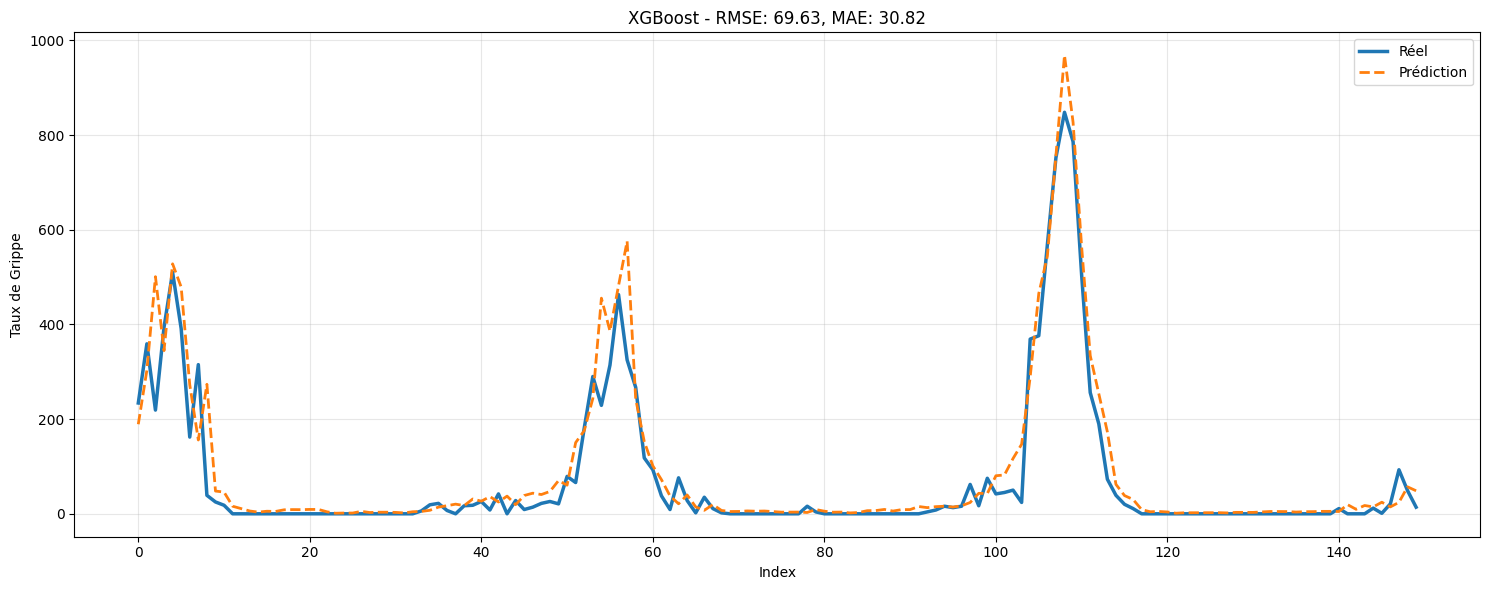


 REFIT XGBOOST (FULL TRAIN)
 Modèle final entraîné sur toutes les données train!

 PREDICTION RECURSIVE SUR TEST
Prédiction pour 104 semaines...

  ✓ Semaine 201220 (20/104) - moyenne: 17.9
  ✓ Semaine 201240 (40/104) - moyenne: 24.5
  ✓ Semaine 201308 (60/104) - moyenne: 215.7
  ✓ Semaine 201328 (80/104) - moyenne: 6.6
  ✓ Semaine 201348 (100/104) - moyenne: 50.3

 Prédiction récursive terminée!

 CREATION SUBMISSION

 Fichier sauvegardé: submission_xgboost_advanced.csv
Shape: (2288, 2)
Min: 0.56
Max: 898.45
Mean: 84.81
Median: 24.91

Aperçu:
        Id  TauxGrippe
521   3235  112.961365
1043  3236   77.561287
1565  3237   73.092850
2087  3238   67.086090
2609  3239   87.306664
3131  3240   65.806213
3653  3241   68.353691
4175  3242   67.241043
4697  3243   88.209457
5219  3244   61.540279


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Chargement et Tri
# IMPORTANT: on utilise train_full (déjà chargé ailleurs)
df = train_full.copy()

# Extraction de l'année et du numéro de semaine depuis 'week' (ex: 201152)
df['year'] = df['week'].astype(str).str[:4].astype(int)
df['week_num'] = df['week'].astype(str).str[4:].astype(int)

# --- CRUCIAL : TRIER LES DONNÉES ---
# Pour que les décalages (lags) soient cohérents, il faut trier par Région puis par Temps
df = df.sort_values(by=['region_name', 'year', 'week_num'])

# 2. Feature Engineering Spécial Panel
# On crée les "Lags" : La grippe de la semaine dernière (t-1) prédit celle de cette semaine (t)
# Le .groupby('region_name') est vital pour ne pas mélanger les régions entre elles !
df['Taux_Lag1'] = df.groupby('region_name')['TauxGrippe'].shift(1)
df['Taux_Lag2'] = df.groupby('region_name')['TauxGrippe'].shift(2)

# On peut aussi faire une moyenne mobile sur 3 semaines (lissage)
df['Taux_Rolling3'] = df.groupby('region_name')['Taux_Lag1'].transform(lambda x: x.rolling(3).mean())

# On supprime les premières lignes qui contiennent des NaN à cause du décalage
df_model = df.dropna().copy()

# 3. Encodage de la variable catégorielle 'region_name'
df_encoded = pd.get_dummies(df_model, columns=['region_name'], drop_first=True)

# 4. Division Train / Validation (2 dernières années)
# On identifie l'année max
max_year = df_encoded['year'].max()
split_cutoff = max_year - 2  # On garde les 2 dernières années pour la valid

print(f"Année max : {max_year}")
print(f"Coupure : Train <= {split_cutoff} | Validation > {split_cutoff}")

# Sélection des features (tout sauf la cible et les ID/dates brutes)
target = 'TauxGrippe'
cols_to_drop = [target, 'Id', 'week', 'week_date', 'month_date', 'month']
# On garde 'year' et 'week_num' car ce sont des entiers utiles, mais on retire les formats dates s'ils existent
features = [col for col in df_encoded.columns if col not in cols_to_drop]

# SPLIT
X_train = df_encoded[df_encoded['year'] <= split_cutoff][features]
y_train = df_encoded[df_encoded['year'] <= split_cutoff][target]

X_val = df_encoded[df_encoded['year'] > split_cutoff][features]
y_val = df_encoded[df_encoded['year'] > split_cutoff][target]

print(f"Dimensions Train : {X_train.shape}")
print(f"Dimensions Valid : {X_val.shape}")

# 5. Entraînement (CatBoost à la place de RandomForest)
model = CatBoostRegressor(
    loss_function="RMSE",
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    random_seed=42,
    verbose=200
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

# 6. Évaluation
preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
mae = mean_absolute_error(y_val, preds)

print(f"\n--- RÉSULTATS SUR LES 2 DERNIÈRES ANNÉES ---")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")

# 7. Visualisation des prédictions (Zoom sur les 100 premières semaines du set de validation)
plt.figure(figsize=(12, 6))
plt.plot(y_val.values[:100], label='Réel', color='black')
plt.plot(preds[:100], label='Prédiction', color='orange', linestyle='--')
plt.title(f"Prédictions sur le set de Validation ({max_year-1}-{max_year})")
plt.legend()
plt.show()

# Importance des variables
importance = pd.Series(model.get_feature_importance(), index=features).sort_values(ascending=False)
print("\nTop 5 Variables Importantes :")
print(importance.head(5))

# ============================================================
# INSPECTION TRAIN_FULL / TEST_FULL (même logique que ton check)
# ============================================================

print("\n--- TRAIN_FULL ---")
print(f"Weeks: {train_full['week'].min()} to {train_full['week'].max()}")
print(f"Shape: {train_full.shape}")

print("\n--- TEST_FULL ---")
print(f"Weeks: {test_full['week'].min()} to {test_full['week'].max()}")
print(f"Shape: {test_full.shape}")
print(f"Columns: {test_full.columns.tolist()}")

train_regions = set(train_full['region_name'].unique())
test_regions = set(test_full['region_name'].unique())
print(f"\nRegions diff: {train_regions.symmetric_difference(test_regions)}")

max_train_week = train_full['week'].max()
min_test_week = test_full['week'].min()
print(f"\nMax Train Week: {max_train_week}")
print(f"Min Test Week: {min_test_week}")
